# Imports

In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# Iris Data

In [103]:
class IrisDataset(Dataset):
	def __init__(self, data, labels):
		self.data = torch.tensor(data, dtype=torch.float32)
		self.labels = torch.tensor(labels, dtype=torch.long)

	def __len__(self):
		return len(self.data)

	def __getitem__(self, idx):
		return self.data[idx], self.labels[idx]

In [104]:
iris = load_iris()
data = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=12)
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Constants

In [105]:
class Constants:
	NUMBER_OF_FEATURES = 4
	NUMBER_OF_CLASSES = 3
	LEARNING_RATE = 0.05
	EPOCHS = 100

# Logistic Regression

In [106]:
class LogisticRegression(nn.Module):
	def __init__(self, number_of_features, number_of_classes):
		super().__init__()
		self.linear = nn.Linear(number_of_features, number_of_classes)

	def forward(self, x):
		linear = self.linear(x)
		probas = F.sigmoid(linear)
		return linear, probas

In [107]:
model = LogisticRegression(
	number_of_features=Constants.NUMBER_OF_FEATURES, number_of_classes=Constants.NUMBER_OF_CLASSES)
cross_entropy_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=Constants.LEARNING_RATE)

train_loss = []
for epoch in range(Constants.EPOCHS):

	current_loss = 0.
	# iterate train_loader cause __getitem__ returns inputs & labels
	for inputs, labels in train_loader:
		# forward
		outputs, _ = model(inputs)
		loss = cross_entropy_loss(outputs, labels)

		# backward
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		current_loss += loss.item()

	train_loss.append(current_loss / len(train_loader))
	print(f"Epoch [{epoch + 1}/{Constants.EPOCHS}], Loss: {current_loss / len(train_loader):.4f}")


Epoch [1/100], Loss: 1.3158
Epoch [2/100], Loss: 1.0132
Epoch [3/100], Loss: 0.7383
Epoch [4/100], Loss: 0.6758
Epoch [5/100], Loss: 0.6441
Epoch [6/100], Loss: 0.6091
Epoch [7/100], Loss: 0.6193
Epoch [8/100], Loss: 0.5559
Epoch [9/100], Loss: 0.4846
Epoch [10/100], Loss: 0.5787
Epoch [11/100], Loss: 0.5491
Epoch [12/100], Loss: 0.4902
Epoch [13/100], Loss: 0.4633
Epoch [14/100], Loss: 0.4754
Epoch [15/100], Loss: 0.4318
Epoch [16/100], Loss: 0.4897
Epoch [17/100], Loss: 0.4339
Epoch [18/100], Loss: 0.4266
Epoch [19/100], Loss: 0.3583
Epoch [20/100], Loss: 0.3889
Epoch [21/100], Loss: 0.3712
Epoch [22/100], Loss: 0.3537
Epoch [23/100], Loss: 0.3613
Epoch [24/100], Loss: 0.3561
Epoch [25/100], Loss: 0.3399
Epoch [26/100], Loss: 0.3927
Epoch [27/100], Loss: 0.3707
Epoch [28/100], Loss: 0.3074
Epoch [29/100], Loss: 0.3179
Epoch [30/100], Loss: 0.3779
Epoch [31/100], Loss: 0.3337
Epoch [32/100], Loss: 0.2907
Epoch [33/100], Loss: 0.2904
Epoch [34/100], Loss: 0.3169
Epoch [35/100], Loss: 0

# Plot

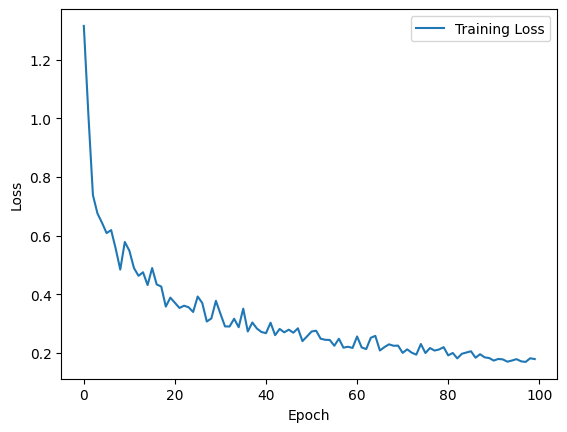

In [108]:

# Plot loss over epochs
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate

In [109]:
model.eval()
with torch.no_grad():
	correct = 0
	total = 0
	for inputs, labels in test_loader:
		outputs, _ = model(inputs)
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()

	print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.78%
